# Random Forest

In [1]:
# # Question 1 
## Company data
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [2]:
!pip install sweetviz


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import sweetviz  as sv

In [4]:
company = pd.read_csv(r"C:\Users\cindr\Downloads\Company_Data.csv")

In [5]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
#EDA using sweetviz
my_report = sv.analyze(company)
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
!pip install pandas-profiling


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas_profiling as pp
profile = pp.ProfileReport(company)
profile.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


C:\Users\cindr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


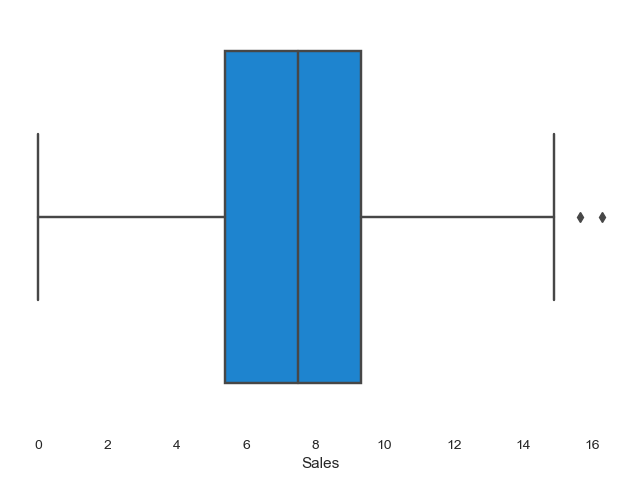

In [11]:
sns.boxplot(company.Sales)
plt.show()

In [12]:
company['Sales'] = company["Sales"].astype('int')

In [13]:
company['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [14]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"
company.Sales=company.Sales.apply(split)

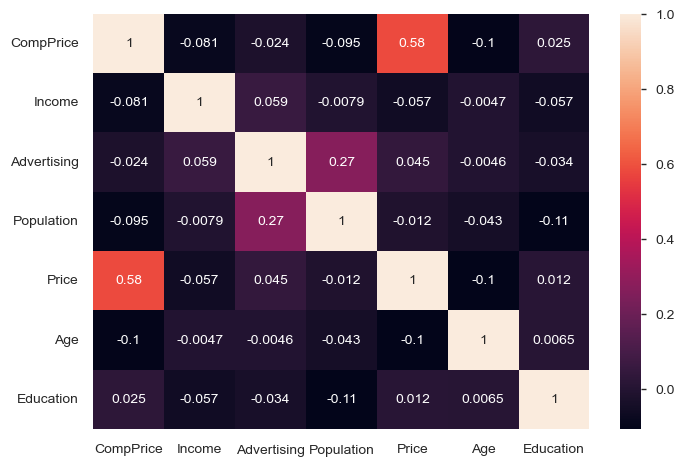

In [15]:
corr=company.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [16]:
le=LabelEncoder()
company["ShelveLoc"]=le.fit_transform(company["ShelveLoc"])
company["Urban"]=le.fit_transform(company["Urban"])
company["US"]=le.fit_transform(company["US"])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,0,42,17,1,1
1,high sale,111,48,16,260,83,1,65,10,1,1
2,high sale,113,35,10,269,80,2,59,12,1,1
3,average sale,117,100,4,466,97,2,55,14,1,1
4,low sale,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high sale,138,108,17,203,128,1,33,14,1,1
396,average sale,139,23,3,37,120,2,55,11,0,1
397,average sale,162,26,12,368,159,2,40,18,1,1
398,average sale,100,79,7,284,95,0,50,12,1,1


In [17]:
x = company.iloc[:,1:11]
y = company.iloc[:,0]

In [18]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
y

0      average sale
1         high sale
2         high sale
3      average sale
4          low sale
           ...     
395       high sale
396    average sale
397    average sale
398    average sale
399    average sale
Name: Sales, Length: 400, dtype: object

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [22]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [23]:
y_pred = model.predict(x_test)

In [24]:
confusion_matrix(y_test,y_pred)

array([[42,  3,  1],
       [ 7, 10,  0],
       [13,  0,  4]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.7

In [26]:
pd.Series(y_pred).value_counts()

average sale    62
high sale       13
low sale         5
dtype: int64

In [27]:
data = pd.DataFrame({"actual":y_test,"predicted":y_pred})
data

,actual,predicted
68,high sale,high sale
96,average sale,average sale
285,average sale,average sale
313,average sale,average sale
286,average sale,average sale
...,...,...
273,high sale,high sale
297,low sale,average sale
320,average sale,average sale
235,average sale,average sale


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

average sale       0.68      0.91      0.78        46
   high sale       0.77      0.59      0.67        17
    low sale       0.80      0.24      0.36        17

    accuracy                           0.70        80
   macro avg       0.75      0.58      0.60        80
weighted avg       0.72      0.70      0.67        80



In [29]:
# Qestion no 02
#(Use Random Forest to prepare a model on fraud data 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good")

In [30]:
fraud = pd.read_csv(r"C:\Users\cindr\Downloads\Fraud_check.csv")

In [31]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [32]:
#EDA using sweetviz
my_report = sv.analyze(fraud)
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
import pandas_profiling as pp
profile = pp.ProfileReport(fraud)
profile.to_widgets()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [35]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [36]:
fraud=fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"})

In [37]:
def split(num):
    if num <30000:
        return  'Risky'
    else:
        return 'Good'
fraud.taxable_income=fraud.taxable_income.apply(split)  

In [38]:
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [39]:
le=LabelEncoder()
fraud['Undergrad'] = le.fit_transform(fraud['Undergrad'])
fraud['marital_status'] = le.fit_transform(fraud['marital_status'])
fraud['Urban'] = le.fit_transform(fraud['Urban'])

In [40]:
fraud.corr()

,Undergrad,marital_status,city_population,work_experience,Urban
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267
marital_status,0.042407,1.000000,-0.001564,-0.002213,0.064562
city_population,0.079579,-0.001564,1.000000,0.013135,-0.040098
work_experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000


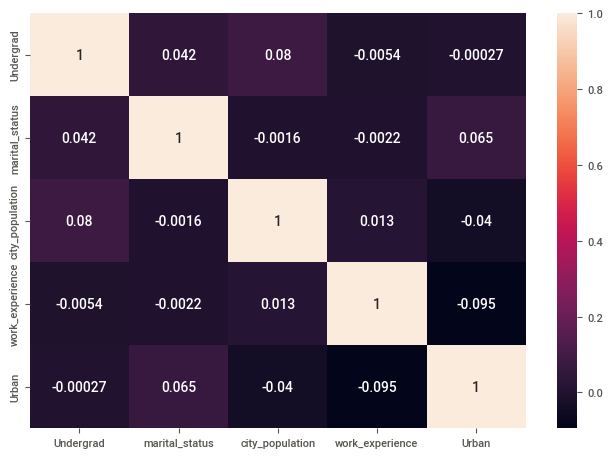

In [41]:
sns.heatmap(fraud.corr(),annot=True)
plt.show()

In [42]:
x=fraud.iloc[:,fraud.columns!="taxable_income"]
y=fraud["taxable_income"]

In [43]:
x

,Undergrad,marital_status,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [44]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((420, 5), (180, 5), (420,), (180,))

In [47]:
model = RandomForestClassifier(n_estimators=10,criterion='entropy',oob_score=False)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [48]:
y_pred = model.predict(x_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[132,  11],
       [ 37,   0]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.7333333333333333

In [51]:
df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
df

,actual,predicted
110,Risky,Good
419,Good,Good
565,Good,Good
77,Good,Risky
181,Risky,Good
...,...,...
54,Good,Good
493,Risky,Good
46,Good,Good
93,Risky,Good


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.92      0.85       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.73       180
   macro avg       0.39      0.46      0.42       180
weighted avg       0.62      0.73      0.67       180

